<a href="https://colab.research.google.com/github/bonsnv/Clustering/blob/main/Tugas_Clustering_4112322020_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : David Stefanus Bona Sihite

NIM : 4112322020

#Clustering menggunakan K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.cluster import KMeans

Dataset yang digunakan adalah data Panjang dan Berat dari 9 Spesies Ikan yang didefinisikan sebagai `df`




In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/bonsnv/Clustering/refs/heads/main/fish_data.csv')
df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


Berikut adalah 9 spesies Ikan dalam dataset

In [3]:
df['species'].unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

Berikut Tipe data dari masing masing Variabel

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [5]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


## Preprocessing

### Mengecek Mising Value

In [6]:
df.isnull().sum().sum()

np.int64(0)

Dikarenakan tidak terdapat data yang hilang maka tidak perlu diberi tindakan

### Mengecek Duplikasi Data

In [7]:
df.duplicated().sum()

np.int64(109)

Terdapat 109 data duplikat pada dataset dan harus diberi tindakan

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3971, 4)

Jadi dataset sekarang hanya mempunyai 3971 baris setelah kita hilangkan data yang duplikat

### Definisi Variabel

In [10]:
X = df.drop('species', axis=1)
y = df.species

Panjang dan Berat didefinisikan sebagai variabel `x` dan Spesies Ikan didefinisikan sebagai variabel `y`

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Kemudian Standardisasi variabel `x` agar fitur lebih mudah dibandingkan dan dapat membantu meningkatkan kinerja model pembelajaran mesin.

## Modeling

karena dataset mempunyai 9 spesies maka nilai K = 9

In [12]:
kmeans = KMeans(n_clusters=9, max_iter=100)

y_kmeans = kmeans.fit_predict(X)

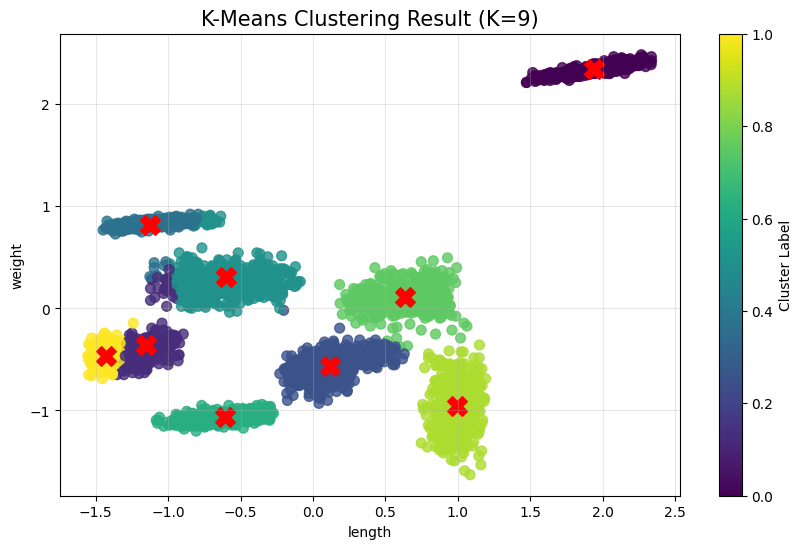

In [13]:
from matplotlib.patches import Patch

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')

plt.title('K-Means Clustering Result (K=9)', fontsize=15)
plt.xlabel('length')
plt.ylabel('weight')
plt.grid(True, alpha=0.3)
plt.colorbar(label='Cluster Label')
plt.show()

pada visualisasi ini ditampilkan hasil K-Means clustering dengan K = 9. Setiap titik pada grafik mewakili satu data, yang dipetakan berdasarkan dua fitur utama yaitu "length" (panjang) di sumbu X dan "weight" (berat) di sumbu Y.

Titik-titik tersebut diwarnai berdasarkan klaster hasil pengelompokan, dengan gradasi warna sesuai label klaster. Tanda silang merah (X) menunjukkan posisi centroid dari masing-masing klaster, yaitu titik pusat yang merepresentasikan lokasi rata-rata dari anggota klaster.



## Evaluasi

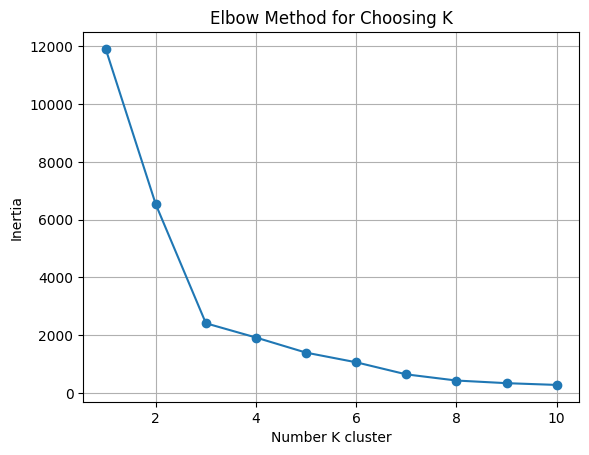

In [14]:
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number K cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method for Choosing K")
plt.grid(True)
plt.show()

Dari grafik terlihat bahwa penurunan nilai inertia terjadi sangat tajam dari K = 1 hingga K = 3. Ini menunjukkan bahwa pembagian data menjadi dua atau tiga klaster secara signifikan meningkatkan kualitas pemisahan. Namun setelah K = 3, penurunan nilai inertia mulai melandai. Artinya, penambahan klaster setelah titik ini tidak memberikan perbaikan yang signifikan terhadap struktur klaster.

Titik siku (elbow) dalam grafik berada pada K = 3, sehingga dapat disimpulkan bahwa jumlah klaster yang optimal untuk data ini adalah tiga klaster. Dengan demikian, model K-Means dengan K = 3 dianggap paling efektif dalam mengelompokkan data berdasarkan pola yang ada.

In [15]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, y_pred)
    print(f"K = {k} -> Silhouette Score = {score:.2f}")

K = 2 -> Silhouette Score = 0.48
K = 3 -> Silhouette Score = 0.63
K = 4 -> Silhouette Score = 0.51
K = 5 -> Silhouette Score = 0.50
K = 6 -> Silhouette Score = 0.54
K = 7 -> Silhouette Score = 0.60
K = 8 -> Silhouette Score = 0.65
K = 9 -> Silhouette Score = 0.65
K = 10 -> Silhouette Score = 0.64


Namun evaluasi menggunakan silhouette score menunjukkan bahwa nilai tertinggi diperoleh pada K = 8 dan K = 9, masing-masing dengan skor 0.65, yang menunjukkan bahwa pada jumlah klaster tersebut, data terbagi dengan sangat baik dan klaster saling terpisah jelas. Namun, K = 3 juga memberikan skor cukup tinggi (0.63), mendekati skor tertinggi tersebut.

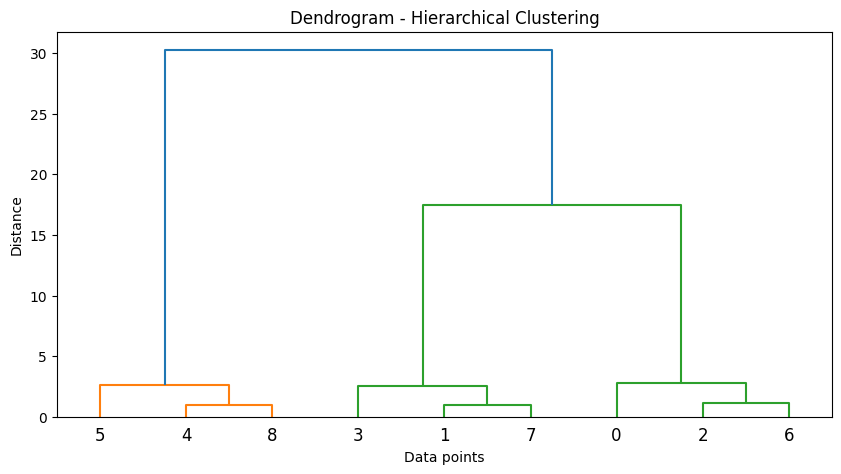

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=9, centers=3, random_state=42)

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

## Kesimpulan

Berdasarkan hasil analisis menggunakan **metode elbow** dan **silhouette score**, dapat disimpulkan bahwa:

1. **Metode elbow** menunjukkan bahwa titik optimal terjadi pada **K = 3**, karena setelah titik ini penurunan *inertia* tidak signifikan. Artinya, tiga klaster sudah cukup untuk merepresentasikan struktur utama data.

2. **Silhouette score** memberikan informasi bahwa kualitas pemisahan klaster terbaik terjadi pada **K = 8 dan K = 9**, dengan skor tertinggi **0.65**. Namun, **K = 3** juga menunjukkan skor yang tinggi (**0.63**), yang berarti hasil klasterisasi pada K = 3 tetap baik dan cukup representatif.

3. Hasil visualisasi K-Means dengan **K = 9** memperlihatkan bahwa data terbagi ke dalam klaster-klaster kecil yang cukup jelas, namun bisa jadi terlalu kompleks atau terlalu terpecah untuk beberapa tujuan analisis.

Jadi, Dengan fitur Panjang dan Berat. Spesies ikan dapat dikelompokkan ke ke 9 nya. Namun jika dlihat dari visualisasinya dapat dikelompokkan menjadi 8 saja.